In [95]:
import numpy
import matplotlib.pyplot as plt
import pysam

In [13]:
ALIGNMENT_FILE = "lact.bam"
GENOME_LENGTH = 3079196

In [22]:
def write_to_wigfile(wigfile_header, wigfile_values, file_name):
    wigfile_content = wigfile_header + "\n"
    
    for wigfile_value in wigfile_values:
        wigfile_content += wigfile_value + "\n"
    
    with open(file_name, 'w') as the_file:
        the_file.write(wigfile_content)

In [23]:
# Physical coverage

samfile = pysam.AlignmentFile(ALIGNMENT_FILE)

genome_change = [0] * GENOME_LENGTH
for read in samfile:
    # Check for left mate pair and SAM flags: 0x1 and 0x2
    if (read.template_length > 0 and read.is_paired and read.is_proper_pair):
        genome_change[read.reference_start] += 1
        genome_change[read.reference_start + read.template_length] -= 1


current_coverage = 0
physical_coverage_values = []

for position in range(GENOME_LENGTH):
    current_coverage += genome_change[position]
    physical_coverage_values.append(current_coverage)
    
write_to_wigfile(wigfile_header="fixedStep chrom=genome start=1 step=1 span=1", 
                 wigfile_values=list(map(str, physical_coverage_values)),
                 file_name="physical_coverage.wig")

In [92]:
# Sequence coverage

samfile = pysam.AlignmentFile(ALIGNMENT_FILE)

genome_change = [0] * GENOME_LENGTH
for read in samfile:
    # Check for SAM flags: 0x1 and 0x2
    if (read.is_paired and read.is_proper_pair):
        genome_change[read.reference_start] += 1
        genome_change[read.reference_end] -= 1


current_coverage = 0
sequence_coverage_values = []

for position in range(GENOME_LENGTH):
    current_coverage += genome_change[position]
    sequence_coverage_values.append(current_coverage)
    
write_to_wigfile(wigfile_header="fixedStep chrom=genome start=1 step=1 span=1", 
                 wigfile_values=list(map(str, sequence_coverage_values)),
                 file_name="sequence_coverage.wig")

In [93]:
# Lengths of genomic insert
samfile = pysam.AlignmentFile(ALIGNMENT_FILE)

insert_lengths = []
for read in samfile:
    # Check for left mate pair and SAM flags: 0x1 and 0x2
    if (read.template_length > 0 and read.is_paired and read.is_proper_pair):
        insert_lengths.append(read.template_length)

In [ ]:
# TODO: Mean and standard deviation



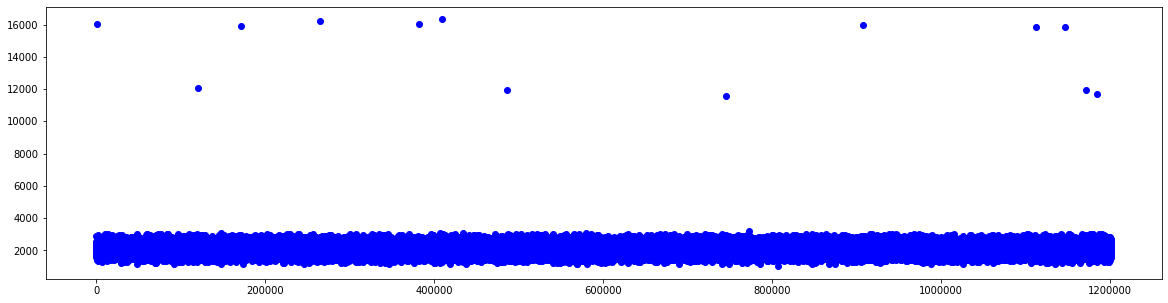

In [114]:
plt.figure(figsize=(20,5))
plt.plot(insert_lengths, "bo")

# TODO: y and x axis names

plt.show()

In [ ]:
# Average length of the physical inserts track (for each bp)